In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# roc curve

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową.

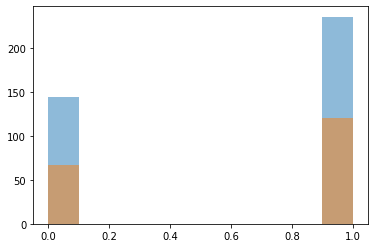

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Zad.
Naucz 

* SVC()
* SVC(C=1, gamma=0.00001)
* LogisticRegression(C=1)

Dla wszystkich modleli wylicz:

* precision    
* recall  
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc

In [10]:
clf_1= SVC(probability=True)
clf_1.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)
print(y_pred_1)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


In [11]:
y_scores_1 = clf_1.decision_function(X_test)
print(y_scores_1)

[ 0.88033706 -2.66185873 -1.18031301  1.45703587  1.53663415 -2.49785116
 -2.03914454 -1.41053199  1.17555643  0.82490498  1.11886466 -1.5791097
  0.59666571 -0.29943913  1.3033204  -1.60425089  0.69435161  1.63337574
  1.49196838 -2.43338608  0.38694006  1.28327132 -2.25377487  1.56704715
  1.5001044   1.24931687  1.16663131  1.62620373  1.27803664 -2.71038171
  1.54939829  1.3835299   1.51445004  0.5653518   1.58062311  1.40407014
 -1.13403185  1.34046584 -2.5025212   0.47118854  1.5597315  -0.71009325
  1.49616371  1.30582617  1.53241182  1.34823242  1.56660208  1.57529552
  1.27352364  1.24233909 -2.17341722 -2.57137261  1.08582146  1.08606732
  1.42909446  0.90422425  1.56830236 -1.3604016   0.69137844  1.51869271
  1.13146065 -2.48993562 -2.18893034  0.77959721  1.36140291  1.11049579
 -1.67085623 -2.34260083  1.48566127  1.09073475  0.39469463 -1.77590286
  0.97943345 -0.31985169  1.50467237  1.029351    0.83548618  0.33104055
  1.50379426  1.46042646 -1.24416626  1.41937136  0.

In [12]:
y_scores_1 = clf_1.predict_proba(X_test)
print(y_scores_1)

##############################################################

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

fpr_clf_1, tpr_clf_1, thresholds_clf_1 = roc_curve(y_test, y_scores_1)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_clf_1, tpr_clf_1, "SVM rbf")
plt.legend(loc="lower right", fontsize=16)
plt.show()

[[1.63231983e-01 8.36768017e-01]
 [9.99566013e-01 4.33987077e-04]
 [9.78140635e-01 2.18593653e-02]
 [4.06534533e-02 9.59346547e-01]
 [3.31939581e-02 9.66806042e-01]
 [9.99330091e-01 6.69909036e-04]
 [9.97744073e-01 2.25592750e-03]
 [9.88096475e-01 1.19035251e-02]
 [8.18920823e-02 9.18107918e-01]
 [1.84320383e-01 8.15679617e-01]
 [9.39055458e-02 9.06094454e-01]
 [9.92378188e-01 7.62181240e-03]
 [2.92591764e-01 7.07408236e-01]
 [8.15952438e-01 1.84047562e-01]
 [5.98158586e-02 9.40184141e-01]
 [9.92868649e-01 7.13135118e-03]
 [2.42056522e-01 7.57943478e-01]
 [2.58947547e-02 9.74105245e-01]
 [3.72003702e-02 9.62799630e-01]
 [9.99205447e-01 7.94553440e-04]
 [4.18419646e-01 5.81580354e-01]
 [6.28673202e-02 9.37132680e-01]
 [9.98721802e-01 1.27819808e-03]
 [3.07076360e-02 9.69292364e-01]
 [3.64375127e-02 9.63562487e-01]
 [6.83689536e-02 9.31631046e-01]
 [8.36853877e-02 9.16314612e-01]
 [2.63775813e-02 9.73622419e-01]
 [6.36876721e-02 9.36312328e-01]
 [9.99618323e-01 3.81676931e-04]
 [3.212765

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        67
          1       0.64      1.00      0.78       121

avg / total       0.41      0.64      0.50       188



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
clf_2= SVC(C=1, gamma=0.00001)
clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)
print(y_pred_2)

y_scores_2 = clf_2.decision_function(X_test)
print(y_scores_2)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]
[ 0.70898825 -1.00236194 -1.57855763  1.17371739  1.07158609 -1.00343717
 -0.99191544 -1.06996703  1.2178239   1.12428267  1.20481063 -1.17893806
  1.06934306 -0.40715973  1.16309052 -1.02356519  1.21640751  1.04322635
  0.80625802 -1.00455279  0.2139963   1.07752716 -0.99272286  1.04310368
  1.07878691  1.37457623  1.29304855  1.03391461  1.21185613 -1.00325497
  1.0436517   1.14396633  1.02501666  0.56569841  1.04333991  1.0614806
 -1.41429006  1.06543731 -1.00793488  0.72476471  1.0350242  -1.39245416
  1.0792595   1.05201785  1.08405029  1.00718117  1.06013867  1.05432163
  0.99617143  1.25448095 -1.003287

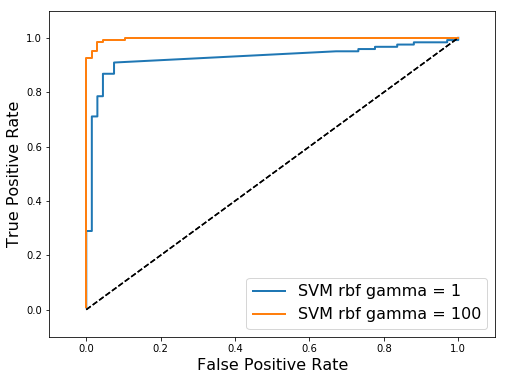

In [29]:
fpr_clf_1, tpr_clf_1, thresholds_clf_1 = roc_curve(y_test, y_scores_1)
fpr_clf_2, tpr_clf_2, thresholds_clf_2 = roc_curve(y_test, y_scores_2)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_clf_1, tpr_clf_1, "SVM rbf gamma = 1")
plot_roc_curve(fpr_clf_2, tpr_clf_2, "SVM rbf gamma = 100")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94        67
          1       0.94      0.99      0.97       121

avg / total       0.96      0.96      0.96       188



In [31]:
clf_3= LogisticRegression(C=1)
clf_3.fit(X_train, y_train)

y_pred_3 = clf_3.predict(X_test)
print(y_pred_3)

y_scores_3 = clf_3.decision_function(X_test)
print(y_scores_3)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 1]
[  1.50313066 -18.56880261  -5.74110698   5.50253061   6.95640158
 -21.38945675 -27.21314517  -4.60058067   5.46210878   4.06137855
   2.47658228  -7.28475244   4.37154779  -1.56759757   5.50494469
  -6.32692055   5.56516456   8.0242789    6.00719891 -15.81946997
   1.63176977   3.93235954 -20.14221831   4.85555982   4.18040032
   7.10259106   5.38328761   4.49843437   4.72993401 -17.46329441
   4.69045201   6.32176885   3.55661836   3.85222231   5.87473142
   4.95812807  -5.45828116   4.85067355 -11.77796636   1.16283355
   5.67388045  -6.81218923   5.93680951   4.03319956   6.28946935
   2.40769982   6.10420

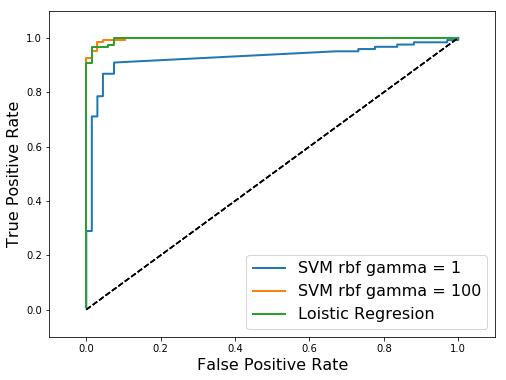

In [32]:
fpr_clf_1, tpr_clf_1, thresholds_clf_1 = roc_curve(y_test, y_scores_1)
fpr_clf_2, tpr_clf_2, thresholds_clf_2 = roc_curve(y_test, y_scores_2)
fpr_clf_3, tpr_clf_3, thresholds_clf_3 = roc_curve(y_test, y_scores_3)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_clf_1, tpr_clf_1, "SVM rbf gamma = 1")
plot_roc_curve(fpr_clf_2, tpr_clf_2, "SVM rbf gamma = 100")
plot_roc_curve(fpr_clf_3, tpr_clf_3, "Loistic Regresion")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        67
          1       0.97      0.97      0.97       121

avg / total       0.96      0.96      0.96       188



In [34]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_1))
print(roc_auc_score(y_test, y_pred_2))
print(roc_auc_score(y_test, y_pred_3))

0.5
0.9436289626248922
0.9536203281115087
